Plot quality vs fitness of all memes for phi=5, theta=1 (file name: 04)

In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
import os 
import collections
import pickle as pkl
import infosys.utils as utils
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
RES_PATH = '/N/slate/baotruon/marketplace/long_results/vary_thetaphi_2runs'
nohub = os.path.join(RES_PATH, 'none_04.json.gz')
hub = os.path.join(RES_PATH, 'hubs_04.json.gz')

In [5]:
nohubdata = utils.read_json_compressed(nohub)

In [4]:
nohubdata.keys()

dict_keys(['targeting_criterion', 'theta', 'phi', 'verbose', 'human_network', 'beta', 'gamma', 'graph_gml', 'mode', 'quality', 'diversity', 'discriminative_pow', 'memes', 'feeds'])

In [19]:
nohubdata['memes'][0]

[{'id': 1,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.1509117435209495,
  'fitness': 0.1509117435209495,
  'human_shares': 2,
  'bot_shares': 0,
  'qual_th': 111401,
  'share_th': 161589},
 {'id': 2,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.2529220822140609,
  'fitness': 0.2529220822140609,
  'human_shares': 1,
  'bot_shares': 0,
  'qual_th': 146696,
  'share_th': 132926},
 {'id': 3,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.11152785709898605,
  'fitness': 0.11152785709898605,
  'human_shares': 2,
  'bot_shares': 0,
  'qual_th': 90752,
  'share_th': 159841},
 {'id': 4,
  'is_by_bot': 1.0,
  'phi': 5,
  'quality': 0,
  'fitness': 0.6747891112868585,
  'human_shares': 202,
  'bot_shares': 1,
  'qual_th': 0,
  'share_th': 177324},
 {'id': 5,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality': 0.09736079618213378,
  'fitness': 0.09736079618213378,
  'human_shares': 1,
  'bot_shares': 0,
  'qual_th': 82195,
  'share_th': 77247},
 {'id': 6,
  'is_by_bot': 0.0,
  'phi': 5,
  'quality'

In [6]:
hubdata = utils.read_json_compressed(hub)

In [40]:
quality =[meme['quality'] for meme in nohubdata['memes'][0] if meme['is_by_bot']==0]
fitness = [meme['fitness'] for meme in nohubdata['memes'][0] if meme['is_by_bot']==0]
labels =['nohub']*len(quality)
assert len(labels)==len(quality)

In [41]:
hubquality = [meme['quality'] for meme in hubdata['memes'][0] if meme['is_by_bot']==0]
quality += hubquality
fitness += [meme['fitness'] for meme in hubdata['memes'][0] if meme['is_by_bot']==0]
labels +=['hub']*len(hubquality)
assert len(labels)==len(quality)

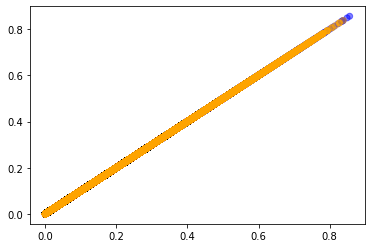

In [42]:
colors = {'nohub':'blue', 'hub':'orange'}
c = [colors[i] for i in labels]
plt.scatter(fitness, quality, color=c, alpha=0.5)

In [45]:
quality =[meme['quality'] for meme in nohubdata['memes'][0]]
fitness = [meme['fitness'] for meme in nohubdata['memes'][0]]
labels =['nohub']*len(quality)
assert len(labels)==len(quality)

hubquality = [meme['quality'] for meme in hubdata['memes'][0]]
quality += hubquality
fitness += [meme['fitness'] for meme in hubdata['memes'][0]]
labels +=['hub']*len(hubquality)
assert len(labels)==len(quality)

Text(0, 0.5, 'quality')

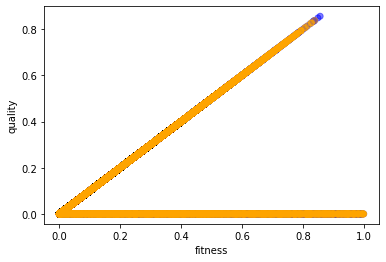

In [46]:
colors = {'nohub':'blue', 'hub':'orange'}
c = [colors[i] for i in labels]
plt.scatter(fitness, quality, color=c, alpha=0.5)
plt.xlabel('fitness')
plt.ylabel('quality')

Plot number of shares vs quality 

In [40]:
def plot_shares_vs_fitness_quality(data, title='no strategy'):
    classes = ['human meme', 'bot meme']
    cmap= ListedColormap(['blue','orange'])
    
    alpha=0.6
    quality =[meme['quality'] for meme in data['memes'][0]]
    fitness =[meme['fitness'] for meme in data['memes'][0]]

    num_shares = [meme['bot_shares']+meme['human_shares'] for meme in data['memes'][0]]
    assert len(num_shares)==len(quality)
    
    colors = [meme['is_by_bot'] for meme in data['memes'][0]]
    
    figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharey=True)
    scatter = ax1.scatter(quality, num_shares, c=colors, cmap=cmap, alpha=alpha)
    
    ax1.set_xlabel('quality')
    ax1.set_ylabel('num_shares')
    ax1.set_title('Number of shares vs quality')
    
    ax2.scatter(fitness, num_shares, c=colors, cmap=cmap, alpha=alpha)
    ax2.set_xlabel('fitness')
    ax2.set_ylabel('num_shares')
    ax2.set_title('Number of shares vs fitness')
    ax2.legend()

    plt.legend(handles=scatter.legend_elements()[0], labels=classes)
    plt.yscale('log')
    
    figure.suptitle(title)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


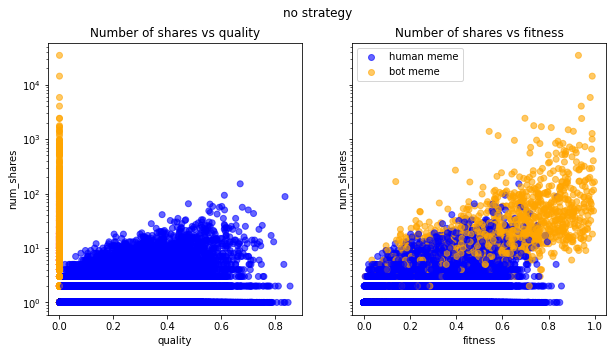

In [41]:
plot_shares_vs_fitness_quality(nohubdata, title='no strategy')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


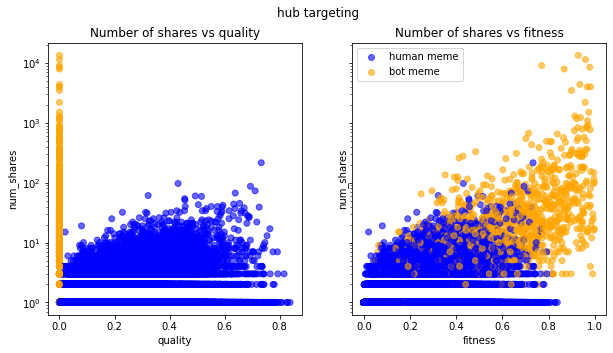

In [42]:
plot_shares_vs_fitness_quality(hubdata, title='hub targeting')

## CCDF: Human fitness vs bot fitness

In [23]:
data = nohubdata
botfitness= [meme['fitness'] for meme in data['memes'][0] if meme['is_by_bot']==1]
humanfitness = [meme['fitness'] for meme in data['memes'][0] if meme['is_by_bot']==0]

In [24]:
data = hubdata
botfitness_hubs= [meme['fitness'] for meme in data['memes'][0] if meme['is_by_bot']==1]
humanfitness_hubs = [meme['fitness'] for meme in data['memes'][0] if meme['is_by_bot']==0]

Text(0.5, 1.0, 'CCDF: Meme fitness')

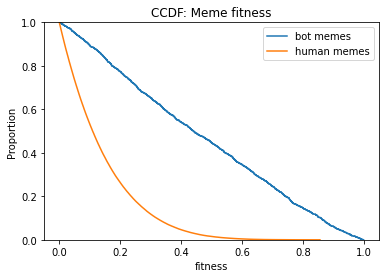

In [27]:
figure, ax= plt.subplots()

sns.ecdfplot(ax=ax, data = botfitness, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax, data = humanfitness, complementary=True, label = 'human memes')
ax.legend()
ax.set_xlabel('fitness')

plt.title('CCDF: Meme fitness')

# Look at distribution of zero-quality junk

In [7]:
data=nohubdata
num_shares = [meme['bot_shares']+meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==1]
num_shares_hubs = [meme['bot_shares']+meme['human_shares'] for meme in hubdata['memes'][0] if meme['is_by_bot']==1]

In [10]:
from scipy.stats import ks_2samp
ks_2samp(num_shares, num_shares_hubs)

KstestResult(statistic=0.13126719050526137, pvalue=1.3633538742396922e-13)

Text(0.5, 1.0, 'Total number of shares for memes by bots')

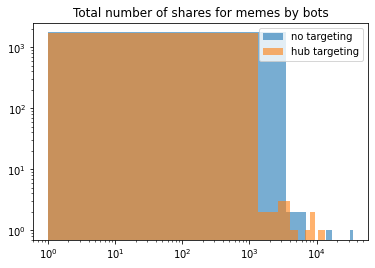

In [8]:
alpha=0.6
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.hist(num_shares, label='no targeting', alpha=alpha)
ax.hist(num_shares_hubs, label='hub targeting', alpha=alpha)
ax.legend()
ax.set_title('Total number of shares for memes by bots')

In [9]:
data=nohubdata
num_shares = [meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==1]
num_shares_hubs = [meme['human_shares'] for meme in hubdata['memes'][0] if meme['is_by_bot']==1]

In [11]:
import seaborn as sns 

/N/u/baotruon/Carbonate/miniconda3/envs/graph/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/N/u/baotruon/Carbonate/miniconda3/envs/graph/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


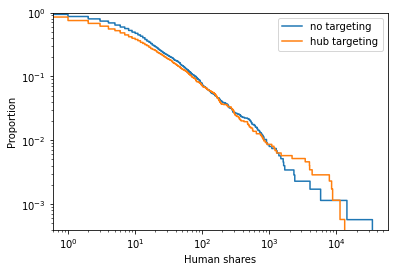

In [18]:
alpha=0.6
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
sns.ecdfplot(ax=ax, data = num_shares, complementary=True, label = 'no targeting')
sns.ecdfplot(ax=ax, data = num_shares_hubs, complementary=True, label = 'hub targeting')
ax.set_xlabel('Human shares')
ax.legend()

Text(0.5, 1.0, 'Total human shares for memes by bots')

<Figure size 432x288 with 0 Axes>

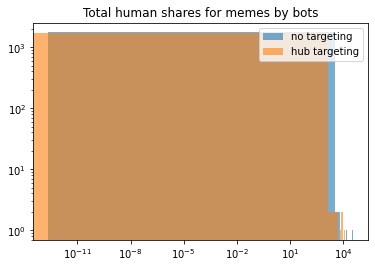

In [10]:
plt.clf()
alpha=0.6
fig, ax = plt.subplots()
# ax.set_xlim(0,max(max(num_shares), max(num_shares_hubs)))

ax.hist(num_shares, label='no targeting', alpha=alpha)
ax.hist(num_shares_hubs, label='hub targeting', alpha=alpha)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_title('Total human shares for memes by bots')

In [28]:
ks_2samp(num_shares, num_shares_hubs)

KstestResult(statistic=0.13472990803284823, pvalue=2.6756374893466273e-14)

# CCDF
## Probability of being shared

In [7]:
data = nohubdata
botmemes= [meme['bot_shares']+meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==1]
humanmemes = [meme['bot_shares']+meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==0]

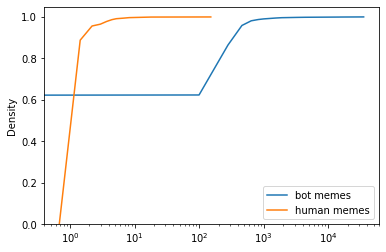

In [18]:
fig,ax = plt.subplots()
sns.kdeplot(ax=ax, data = botmemes, cumulative = True, label = 'bot memes')
sns.kdeplot(ax=ax, data = humanmemes, cumulative = True, label = 'human memes')
ax.legend()
ax.set_xscale('log')
# ax.set_xlim([0, 1])

### Compare strategies

In [13]:
data = nohubdata
botmemes_none = [meme['bot_shares']+meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==1]
humanmemes_none = [meme['bot_shares']+meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==0]

In [14]:
data = hubdata
botmemes_hubs = [meme['bot_shares']+meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==1]
humanmemes_hubs = [meme['bot_shares']+meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==0]

Text(0.5, 0.98, 'CDF: Total number of shares during simulation')

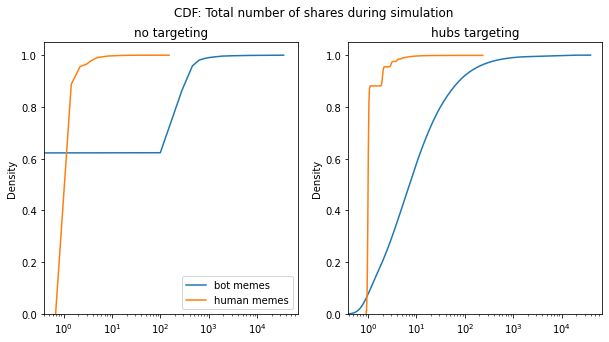

In [10]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=True)

sns.kdeplot(ax=ax1, data = botmemes_none, cumulative = True, label = 'bot memes')
sns.kdeplot(ax=ax1, data = humanmemes_none, cumulative = True, label = 'human memes')
ax1.legend()
ax1.set_xscale('log')

sns.kdeplot(ax=ax2, data = botmemes_hubs, cumulative = True, label = 'bot memes')
sns.kdeplot(ax=ax2, data = humanmemes_hubs, cumulative = True, label = 'human memes')

ax1.set_title('no targeting')
ax2.set_title('hubs targeting')

figure.suptitle('CDF: Total number of shares during simulation')
# ax.set_xlim([0, 1])

Text(0.5, 0.98, 'CCDF: Total number of shares during simulation')

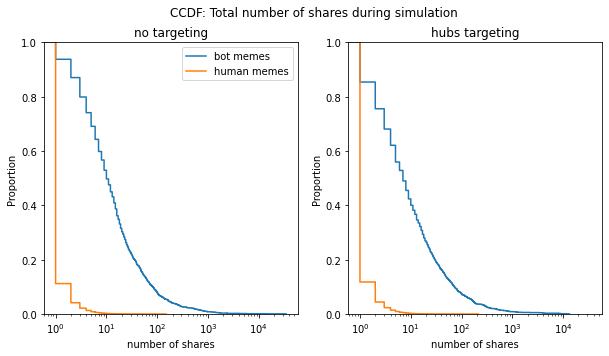

In [21]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=True)

sns.ecdfplot(ax=ax1, data = botmemes_none, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax1, data = humanmemes_none, complementary=True, label = 'human memes')
ax1.legend()
ax1.set_xscale('log')

sns.ecdfplot(ax=ax2, data = botmemes_hubs, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax2, data = humanmemes_hubs, complementary=True, label = 'human memes')

ax1.set_title('no targeting')
ax2.set_title('hubs targeting')
ax1.set_xlabel('number of shares')
ax2.set_xlabel('number of shares')

figure.suptitle('CCDF: Total number of shares during simulation')
# ax.set_xlim([0, 1])

## Shared by humans 

In [28]:
data = nohubdata
botmemes_none = [meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==1]
humanmemes_none = [meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==0]

In [29]:
data = hubdata
botmemes_hubs = [meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==1]
humanmemes_hubs = [meme['human_shares'] for meme in data['memes'][0] if meme['is_by_bot']==0]

/N/u/baotruon/Carbonate/miniconda3/envs/graph/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0.98, 'CCDF: Total number of shares during simulation')

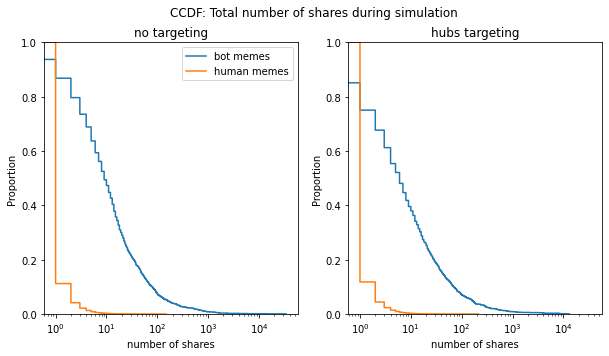

In [30]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=True)

sns.ecdfplot(ax=ax1, data = botmemes_none, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax1, data = humanmemes_none, complementary=True, label = 'human memes')
ax1.legend()
ax1.set_xscale('log')

sns.ecdfplot(ax=ax2, data = botmemes_hubs, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax2, data = humanmemes_hubs, complementary=True, label = 'human memes')

ax1.set_title('no targeting')
ax2.set_title('hubs targeting')
ax1.set_xlabel('number of shares')
ax2.set_xlabel('number of shares')

figure.suptitle('CCDF: Total number of shares during simulation')
# ax.set_xlim([0, 1])

## Probability of being shared given quality

In [9]:
data = nohubdata 

total_humshares = sum([meme['human_shares'] for meme in nohubdata['memes'][0]])
total_botshares = sum([meme['bot_shares'] for meme in nohubdata['memes'][0]])
total_shares= total_humshares+ total_botshares


hs_probs=[]
bs_probs=[]
quals= []
fitness=[]
share_probs = []
labels = []

for meme in nohubdata['memes'][0]:
    quals+=[meme['quality']]
    fitness+=[meme['fitness']]
    hs_probs+=[meme['human_shares']/total_shares]
    bs_probs+=[meme['bot_shares']/total_shares]
    share_probs+=[meme['human_shares']/total_shares]
    labels +=[meme['is_by_bot']]


Text(0, 0.5, 'prob. of being shared')

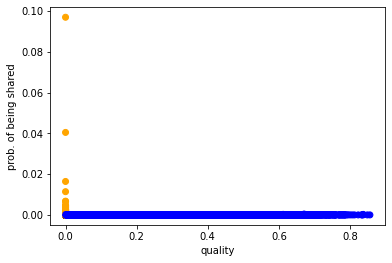

In [10]:
colors = {0:'blue', 1:'orange'}
plt.scatter(quals, share_probs, c=[colors[i] for i in labels])
plt.xlabel('quality')
plt.ylabel('prob. of being shared')

In [28]:
data = hubdata 

total_humshares = sum([meme['human_shares'] for meme in nohubdata['memes'][0]])
total_botshares = sum([meme['bot_shares'] for meme in nohubdata['memes'][0]])
total_shares= total_humshares+ total_botshares


hs_probs=[]
bs_probs=[]
quals= []
fitness=[]
share_probs = []
labels = []

for meme in nohubdata['memes'][0]:
    quals+=[meme['quality']]
    fitness+=[meme['fitness']]
    hs_probs+=[meme['human_shares']/total_humshares]
    bs_probs+=[meme['bot_shares']/total_botshares]
    share_probs+=[meme['human_shares']/total_shares]
    labels +=[meme['is_by_bot']]


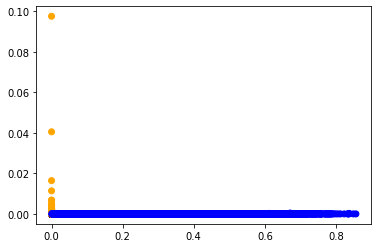

In [29]:
colors = {0:'blue', 1:'orange'}
plt.scatter(quals, share_probs, c=[colors[i] for i in labels])

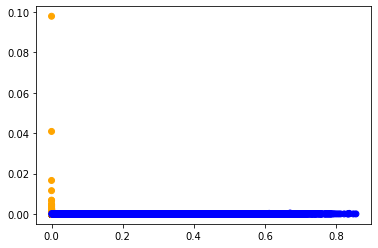

In [30]:
colors = {0:'blue', 1:'orange'}
plt.scatter(quals, hs_probs, c=[colors[i] for i in labels])

Targeting doesn't increase the probability of bad things being shared

## Plot the probability of an agent sharing bot meme

In [43]:
nohubdata['feeds'][0]

{'65537': [176788,
  176677,
  176668,
  175913,
  168415,
  174490,
  140391,
  171726,
  174079,
  134383,
  79663,
  173779,
  173539,
  134383,
  111214],
 '65538': [174369,
  177235,
  166086,
  124424,
  176236,
  171726,
  170151,
  175033,
  79663,
  174545,
  174369,
  130601,
  169530,
  173863,
  111372],
 '5': [177388,
  177235,
  177070,
  170151,
  168415,
  176405,
  176623,
  176621,
  176282,
  168415,
  164091,
  150726,
  174553,
  175928,
  175914],
 '32775': [177376,
  111214,
  177237,
  177300,
  177292,
  177261,
  177256,
  161571,
  111214,
  177036,
  177200,
  177194,
  177153,
  177134,
  177129],
 '98314': [177271,
  150726,
  159712,
  159917,
  176236,
  177082,
  177077,
  176883,
  176788,
  176785,
  167439,
  176564,
  176529,
  176279,
  175626],
 '32780': [177385,
  176259,
  111214,
  161571,
  177344,
  177359,
  111214,
  161571,
  176976,
  176791,
  111214,
  161571,
  111214,
  111214,
  111372],
 '131084': [177381,
  159712,
  177329,
  1773

In [15]:
data = nohubdata

bot_memes = [meme['id'] for meme in data['memes'][0] if meme['is_by_bot']==1]
human_memes = [meme['id'] for meme in data['memes'][0] if meme['is_by_bot']==0]

bot_shares = []
human_shares =[]
for agent,memes in data['feeds'][0].items():
    bot_shares += [len([memeid for memeid in memes if memeid in bot_memes])]
    human_shares += [len([memeid for memeid in memes if memeid in human_memes])]

In [16]:
import pickle as pkl

pkl.dump(bot_shares, open('bot_shares_none.pkl', 'wb'))
pkl.dump(human_shares, open('human_shares_none.pkl', 'wb'))

In [17]:
data = hubdata

bot_memes = [meme['id'] for meme in data['memes'][0] if meme['is_by_bot']==1]
human_memes = [meme['id'] for meme in data['memes'][0] if meme['is_by_bot']==0]

bot_shares_hubs = []
human_shares_hubs =[]
for agent,memes in hubdata['feeds'][0].items():
    bot_shares_hubs += [len([memeid for memeid in memes if memeid in bot_memes])]
    human_shares_hubs += [len([memeid for memeid in memes if memeid in human_memes])]

In [18]:
pkl.dump(bot_shares_hubs, open('bot_shares_hubs.pkl', 'wb'))
pkl.dump(human_shares_hubs, open('human_shares_hubs.pkl', 'wb'))

## Data saved so run from here!

In [5]:
bot_shares = pkl.load(open('bot_shares_none.pkl', 'rb'))
human_shares = pkl.load(open('human_shares_none.pkl', 'rb'))

bot_shares_hubs = pkl.load(open('bot_shares_hubs.pkl', 'rb'))
human_shares_hubs = pkl.load(open('human_shares_hubs.pkl', 'rb'))

Text(0.5, 0.98, "CCDF: number of memes on agent's feed (final state)")

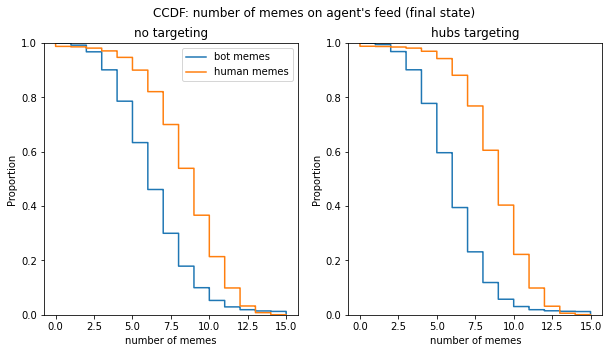

In [31]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), sharex=True)

sns.ecdfplot(ax=ax1, data = bot_shares, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax1, data = human_shares, complementary=True, label = 'human memes')
ax1.legend()

sns.ecdfplot(ax=ax2, data = bot_shares_hubs, complementary=True, label = 'bot memes')
sns.ecdfplot(ax=ax2, data = human_shares_hubs, complementary=True, label = 'human memes')

ax1.set_title('no targeting')
ax2.set_title('hubs targeting')
ax1.set_xlabel('number of memes')
ax2.set_xlabel('number of memes')

figure.suptitle("CCDF: number of memes on agent's feed (final state)")
# ax.set_xlim([0, 1])

AttributeError: 'Figure' object has no attribute 'title'

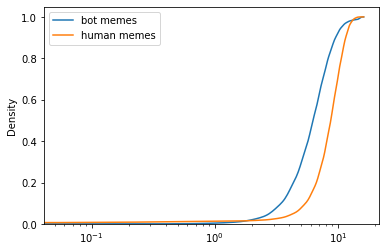

In [48]:
fig,ax = plt.subplots()
sns.kdeplot(ax=ax, data = bot_shares, cumulative = True, label = 'bot memes')
sns.kdeplot(ax=ax, data = human_shares, cumulative = True, label = 'human memes')
ax.legend()
ax.set_xscale('log')
plt.title('CDF: number of shares per agent')
# ax.set_xlim([0, 1])